
Vemos los metadatos, para la comprensión de nuestros datos e importamos las librerias, y el conjunto de datos para su preprocesamiento y análisis.


*   age= edad
*   sex= sexo
*   bmi= índice de masa corporal
*   children= Número de hijos
*   smoker= si es o no fumador
*   region= Localidad donde vive
*   charges= Prima del seguro












In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_seguro= pd.read_csv('/content/drive/MyDrive/PROYECTO MODULO 3/insurance.csv')

Vemmos los  datos y de qué tipo son, así como la presencia o no de nulos

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_seguro.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df_seguro['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df_seguro['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

El rango de edades de nuestros datos son de 18 a 64 años, vamos a ordenar nuestro df según la región poniendo esta columna como índice

In [ ]:
df_insurances= pd.crosstab(index=df_seguro['region'], columns=df_seguro['sex'])
df_insurances

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


Observamos que la proporción de hombres y mujeres en mis datos es muy parecida. Así como hay un predominio de personas no fumadoras. Vamos a graficar dichos resultados, para su mejor visión

In [ ]:
df_smoker=pd.crosstab(index=df_seguro['sex'], columns= df_seguro['smoker'])
df_smoker

smoker,no,yes
sex,,
female,547,115
male,517,159


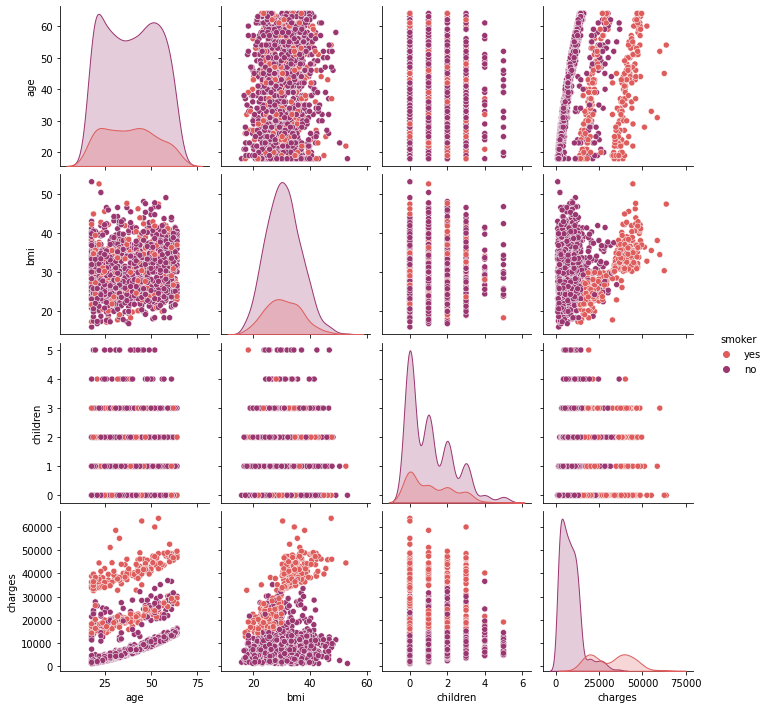

In [ ]:
sns.pairplot(df_seguro,hue='smoker', palette='flare')

In [ ]:
df_seguro['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Viendo la representación gráfica de mis datos, cabe plantearse, que existe una notable diferencia entre personas si son o no fumadoras y el precio de las primas de seguro, sinedo independientes de la edad del asegurado.

In [ ]:
df_charges= pd.crosstab(index=df_seguro['region'], columns=df_seguro['charges']).T
df_charges



region,northeast,northwest,southeast,southwest
charges,,,,
1121.87390,0,0,1,0
1131.50660,0,0,1,0
1135.94070,0,0,1,0
1136.39940,0,0,1,0
1137.01100,0,0,1,0
...,...,...,...,...
55135.40209,0,1,0,0
58571.07448,1,0,0,0
60021.39897,0,1,0,0


In [ ]:
df_sex= pd.crosstab(index=df_seguro['region'], columns=df_seguro['sex']).T
df_sex


region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


Creamos un nuevo conjunto de datos cuyo índice sea la región y así tenemos agrupaciones de datos

In [ ]:
df_regions=df_seguro.sort_values(by=['region'], inplace=True)
df_regions= df_seguro.set_index('region')
df_regions.head()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,62,male,32.015,0,yes,45710.20785
northeast,32,male,37.335,1,no,4667.60765
northeast,53,male,30.495,0,no,10072.05505
northeast,54,male,32.775,0,no,10435.06525
northeast,52,male,33.250,0,no,9722.76950


In [ ]:
df_regions.value_counts()

age  sex     bmi     children  smoker  charges    
19   male    30.590  0         no      1639.56310     2
47   male    29.830  3         no      9620.33070     1
48   female  25.850  3         yes     24180.93350    1
             22.800  0         no      8269.04400     1
47   male    47.520  1         no      8083.91980     1
                                                     ..
31   female  25.740  0         no      3756.62160     1
             23.600  2         no      4931.64700     1
             21.755  0         no      4134.08245     1
30   male    44.220  2         no      4266.16580     1
64   male    40.480  0         no      13831.11520    1
Length: 1337, dtype: int64

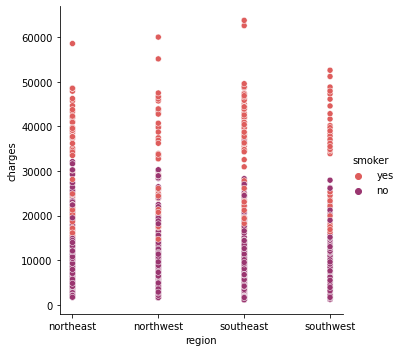

In [ ]:
sns.relplot(data=df_seguro, x='region', y='charges', hue='smoker', palette='flare')

Ojeamos cómo es la distribución de nuestros datos, mediante un histograma

Vamos a cambiar la región por variables numéricas, ya que nuestro modelo utilizará unicamente las variables que sean numéricas, así cómo la búsqueda de outliers (mediante gráficos), y ver si los tengo o no que eliminar (como podemos observar, en el gráfico anterior, hay ya algunos outliers en northeast, northwest y southeast.


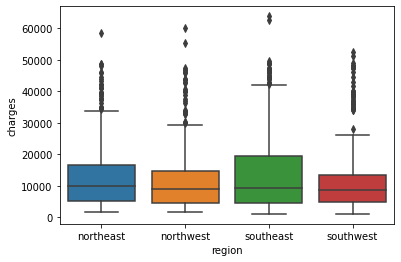

In [ ]:
sns.boxplot( data=df_seguro, x='region', y='charges')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; yo

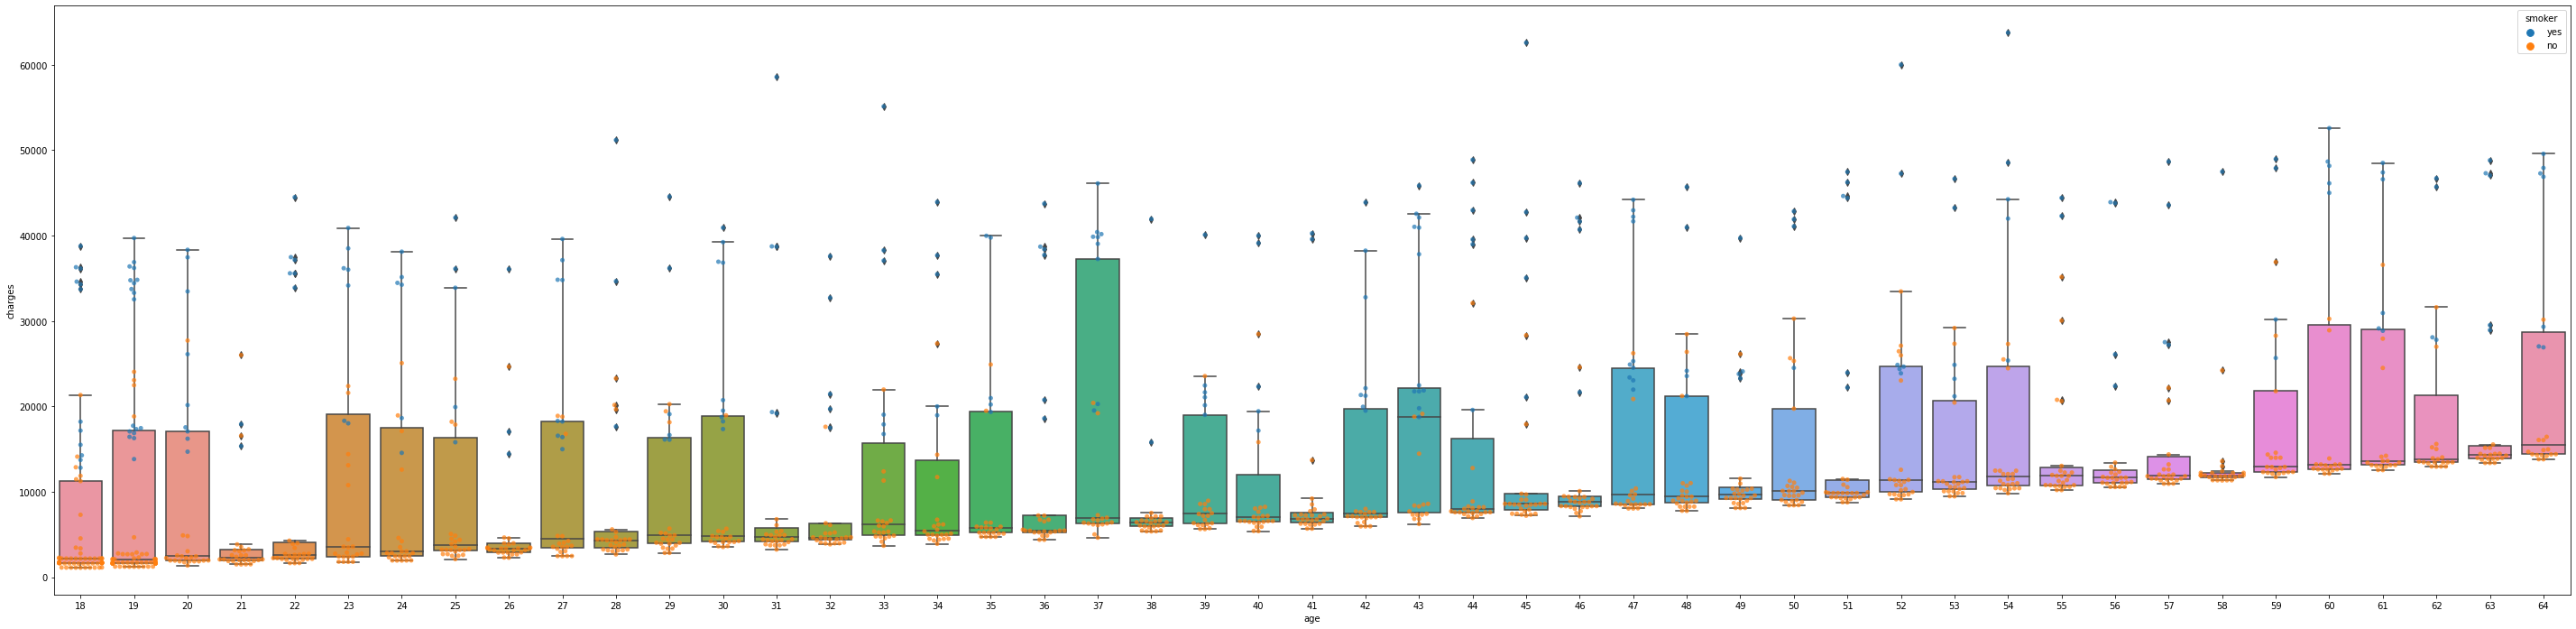

In [ ]:
dims= (50, 12)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= df_seguro, x = 'age', y = 'charges', ax = ax)
sns.swarmplot( data=df_seguro, x='age', y= 'charges', hue= 'smoker', alpha=.7)

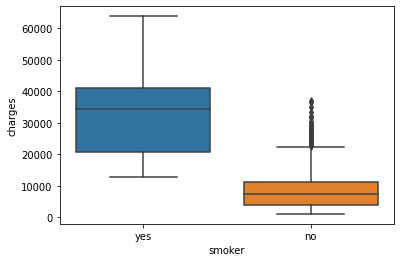

In [ ]:
sns.boxplot( data=df_seguro, x='smoker', y='charges')

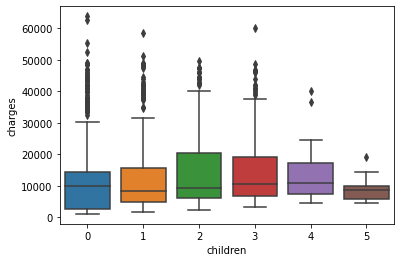

In [ ]:
sns.boxplot( data=df_seguro, x='children', y='charges')

convertimos la columna 'region' en etiquetas numércas

In [ ]:
df_seguro['region']= df_seguro['region'].map({'northeast': 1, 'northwest': 2, 'southeast': 3, 'southwest': 4})


In [ ]:
df_seguro.replace({'sex':{'male':0,'female':1}}, inplace= True)
df_seguro.replace({'smoker': {'no':0, 'yes':1}}, inplace=True)

In [ ]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
668,62,0,32.015,0,1,1,45710.20785
319,32,0,37.335,1,0,1,4667.60765
844,53,0,30.495,0,0,1,10072.05505
317,54,0,32.775,0,0,1,10435.06525
315,52,0,33.250,0,0,1,9722.76950


Vemos cómo están distribuidos nuestros datos mediante un histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93910af190>,
      dtype=object)

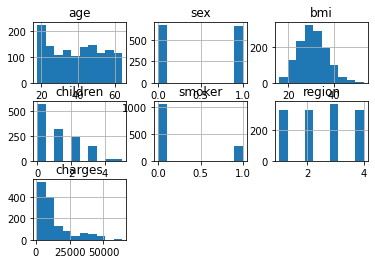

In [ ]:
df_seguro.hist()

ya que mi conjunto de datos tiene outliers, aplico correlación de Spearman y veo cómo están relacionadas mis variables.


In [ ]:
df_segurospearman= df_seguro.corr(method="spearman")


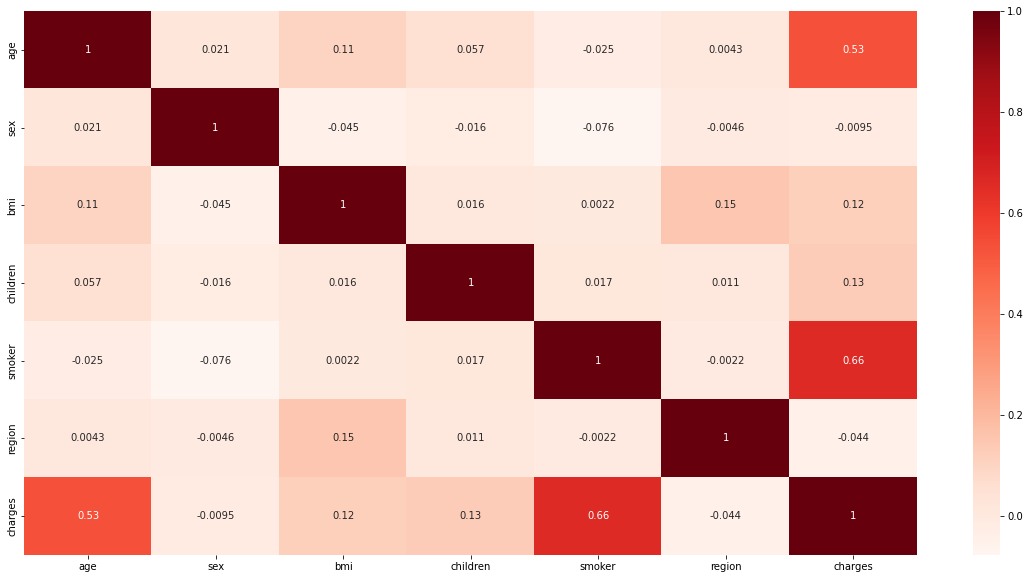

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_segurospearman, annot=True, cmap='Reds')

Las variables, que menos correlacionadas están con mi prima de seguro, son las de sexo y región.
Modifico los outliers de charges y region, que son los que considero más podrían afectar a mi modelo, ya que en el resto de variables hay demasiados y se podrían intentar agrupar 

In [ ]:
def replace_outliers(data, group_variables, label):
  '''
  Parameters
  ----------
  data : pandas.DataFrame
      Object where our data lies.
  group_variables : list
      List where we store the variables we want to take into account when replacing outliers.
  label : list
      List-formatted label.

  Raises
  ------
  numpy.array containing the label column(s) with outliers replaced.
  '''
  data_aux = data
  Q3 = data_aux[group_variables + label].groupby(group_variables).quantile(.75)
  Q1 = data_aux[group_variables + label].groupby(group_variables).quantile(.25)
  IQR = Q3-Q1
  upper_limit = Q3+1.5*IQR
  lower_limit = Q1-1.5*IQR
  upper_limit.columns = [col + '_ul' for col in label]
  lower_limit.columns = [col + '_ll' for col in label]
  data_aux = data_aux.join(upper_limit, on = group_variables, how = 'left')
  data_aux.loc[data_aux.loc[:,label].values[:,0] > data_aux.loc[:,upper_limit.columns].values[:,0],label] = data_aux.loc[data_aux.loc[:,label].values[:,0] > data_aux.loc[:,upper_limit.columns].values[:,0],upper_limit.columns].values
  data_aux = data_aux.join(lower_limit, on = group_variables, how = 'left')
  data_aux.loc[data_aux.loc[:,label].values[:,0] < data_aux.loc[:,lower_limit.columns].values[:,0],label] = data_aux.loc[data_aux.loc[:,label].values[:,0] < data_aux.loc[:,lower_limit.columns].values[:,0],lower_limit.columns].values
  return data_aux.loc[:,label].values

In [ ]:
df_seguro.loc[:,'charges']= replace_outliers(df_seguro,['region'], ['charges'])
df_seguro.loc[:,'charges']= replace_outliers(df_seguro,['age'], ['charges'])


Graficamos para verificar que hemos eliminado los outliers, y así podremos entrenar nuestro modelo

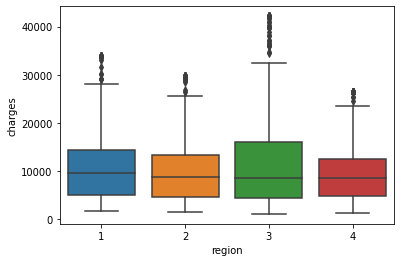

In [ ]:
sns.boxplot(data=df_seguro, x='region', y='charges')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


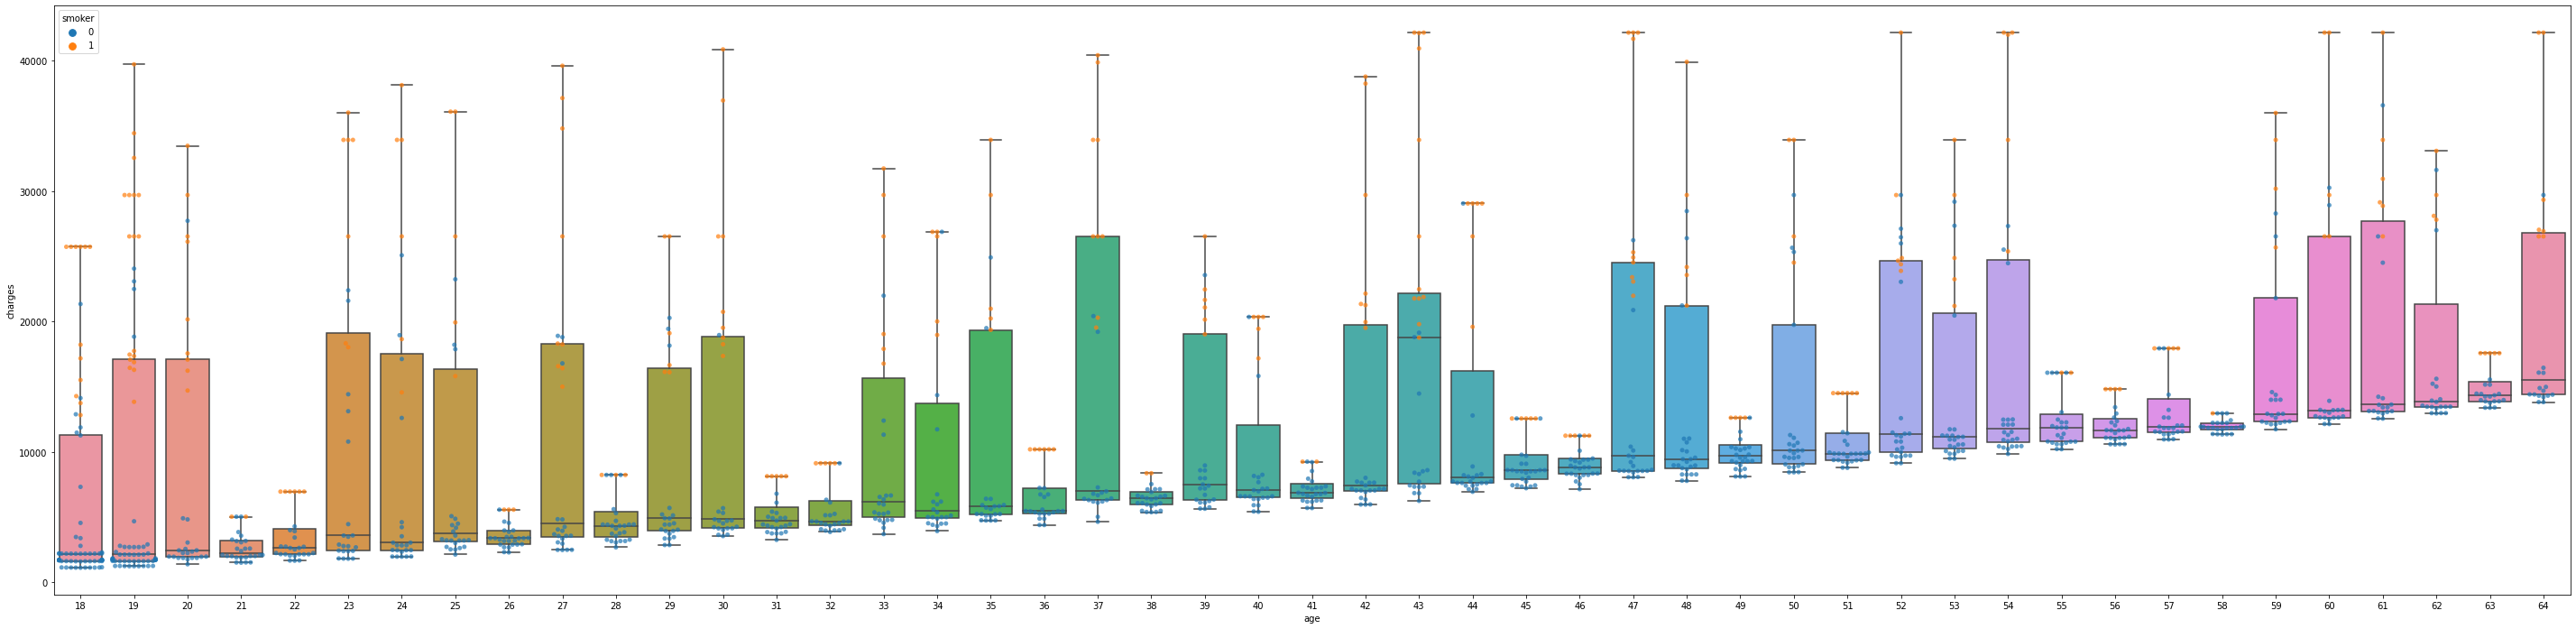

In [ ]:
dims= (50, 12)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= df_seguro, x = 'age', y = 'charges', ax = ax)
sns.swarmplot( data=df_seguro, x='age', y= 'charges', hue= 'smoker', alpha=.7)

Vamos a aplicar un modelo de predicción, en nuestro caso vamos a usar uno sencillito y la variable a predecir será la prima de seguro acorde al resto de variables. Para ello, entrenamos el modelo con el 80% de los datos y testearemos con el 20% restante.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
datos_entrenamiento= df_seguro.sample(frac=0.8, random_state=100)
datos_test= df_seguro.drop(datos_entrenamiento.index)

In [ ]:
datos_entrenamiento

,age,sex,bmi,children,smoker,region,charges
874,44,0,21.850,3,0,1,8891.139500
1326,42,1,32.870,0,0,1,7050.021300
1077,21,0,26.030,0,0,1,2102.264700
118,49,1,27.170,0,0,3,8601.329300
740,45,0,24.035,2,0,1,8604.483650
...,...,...,...,...,...,...,...
646,39,0,26.220,1,0,2,6123.568800
530,57,0,42.130,1,1,3,17944.966606
534,64,0,40.480,0,0,3,13831.115200
776,40,0,32.300,2,0,2,6986.697000


In [ ]:
datos_test

,age,sex,bmi,children,smoker,region,charges
844,53,0,30.495,0,0,1,10072.055050
868,61,0,23.655,0,0,1,13129.603450
301,53,1,22.610,3,1,1,24873.384900
886,57,0,28.975,0,1,1,17944.966606
347,46,0,33.345,1,0,1,8334.457550
...,...,...,...,...,...,...,...
311,19,1,24.700,0,0,4,1737.376000
322,34,0,30.800,0,1,4,26529.695000
836,36,0,31.500,0,0,4,4402.233000
296,19,0,27.700,0,1,4,16297.846000


Quito la variable que quiero predecir en las etiquetas de entrenamiento y test

In [ ]:
etiquetas_entrenamiento = datos_entrenamiento.pop('charges')
etiquetas_test = datos_test.pop('charges')

In [ ]:
etiquetas_entrenamiento

874      8891.139500
1326     7050.021300
1077     2102.264700
118      8601.329300
740      8604.483650
            ...     
646      6123.568800
530     17944.966606
534     13831.115200
776      6986.697000
472      1744.465000
Name: charges, Length: 1070, dtype: float64

In [ ]:
etiquetas_test

844    10072.055050
868    13129.603450
301    24873.384900
886    17944.966606
347     8334.457550
           ...     
311     1737.376000
322    26529.695000
836     4402.233000
296    16297.846000
909     9135.317462
Name: charges, Length: 268, dtype: float64

Entreno mi modelo con los datos y etiquetas de entrenamiento, sin que utilice los datos de test. Como es un conjunto de datos sencillo, el modelo tarda poco.

In [ ]:
modelo= LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

Verificamos cómo de bien se ha entrenado mi modelo, para ello hago predicciones con mis datos de test

In [ ]:
predicciones= modelo.predict(datos_test)
predicciones

array([11469.13499298, 12379.93285588, 25972.84689583, 26840.59478   ,
       10553.44770011, 28602.99385723, 12659.18179446, 25987.30056153,
       23081.29649801, 20741.90876636,  5888.36279498, 10036.93506007,
       18260.59124709,  8227.50690705,  9191.82929363, 28563.67937967,
       23170.45183425,  5793.03866297, 10684.40264468, 18382.34120696,
       10246.10892494, 11352.07905244, 23296.82839095, 10888.77989398,
       11891.81749101,  8091.95436106, 22432.84137613,  3763.5774335 ,
       10372.65189686,  6543.58958326,  6464.09129715, 12652.79837451,
       10565.92631499, 14627.45571449, 13452.80190703,  2836.13260266,
       26609.81091639, 26612.89531427,  9540.96767714, 13315.15250042,
        7143.9352777 ,  4620.48171613,  3372.71304251, 12656.23841992,
        5206.68478695, 12161.5793982 , 19651.9345035 ,  3522.45642107,
        8154.56205964, 17053.39102495, 19489.71251006,  7399.29172814,
       12563.97947224, 12574.96409714, 11827.88221766,  3810.91394786,
      

Vamos a comparar estos resulados con las etiquetas de test que he reservado. Calculando el error que ha tenido mi modelo

In [ ]:
mse= mean_squared_error(etiquetas_test, predicciones)
mse

30257188.629397064

In [ ]:
error= np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print('El porcentaje de error: %f' % (error*100))

El porcentaje de error: 550065.347294


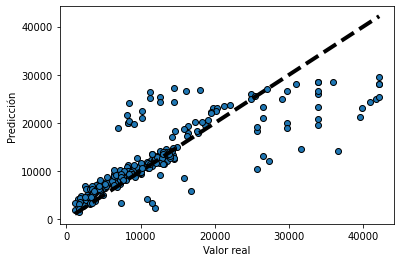

In [ ]:
fig, ax = plt.subplots()
ax.scatter(etiquetas_test, predicciones, edgecolors=(0,0,0))
ax.plot([etiquetas_test.min(),etiquetas_test.max()],[etiquetas_test.min(),etiquetas_test.max()],'k--',lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Predicción')
plt.show()

Mi modelo de regresión lineal es terriblemante malo y tengo mucho underfiting, podría plantearme una regularización siendo la de Lasso la más adecuada (ya que toma las variables más importante para mi predicción, excluyendo las menos importantes), y he de probar con distintos valores de alpha

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.metrics import plot_confusion_matrix

Ajustar la variable para que me salga mejor la regresión, ya que intento hacer una regresión a una variable que no cumple eso, es planteable hacer un logaritmo de mis datos para alinearlos mejor

In [ ]:
modelo.score(datos_test, etiquetas_test)

0.6538271862266084

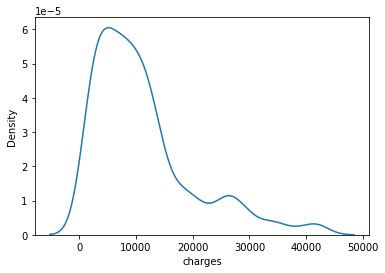

In [ ]:
sns.kdeplot(data= df_seguro, x='charges')

Las matrices de confusión unicamente se pueden usar para modelos de clasificación, de ahí que en nuestro modelo no podamos usarla...

plot_confusion_matrix(modelo, datos_test, etiquetas_test)